In [ ]:
!pip install geopy

In [91]:
import re
import time
import folium
import pandas as pd
from tqdm import tqdm
import seaborn as sns
from bs4 import BeautifulSoup
from selenium import webdriver
from wordcloud import WordCloud
from matplotlib import pyplot as plt
from geopy.geocoders import Nominatim
from selenium.webdriver.common.by import By
from collections import Counter,defaultdict
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import Select
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.support.ui import WebDriverWait
from webdriver_manager.chrome import ChromeDriverManager
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.action_chains import ActionChains
from selenium.common.exceptions import ElementClickInterceptedException

plt.rc('font',family = 'Malgun Gothic')

5성급 호텔

In [ ]:
df = pd.read_csv('./data/hotel_5star_agoda.csv')
df.head()

In [ ]:
df['review'] = None
df

In [ ]:
urls = df['hotel_url'].tolist()
len(urls)

In [92]:
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

In [ ]:
reviews = []

for i in range(9,11):
    # 호텔 url 들어가기 
    driver.get(urls[i])
    time.sleep(5)
    
    # 언어 변경
    try:
        language_dropdown = Select(driver.find_element(By.CSS_SELECTOR, '#reviewFilterSection > div.sc-bdfBwQ.sc-gsTCUz.gdcQLK > div.sc-bdfBwQ.sc-gsTCUz.djZOQg > div > div > label > div.sc-bdfBwQ.sc-gsTCUz.bqqCNI > span > select'))
        # driver.find_element(By.XPATH, '//*[@id="reviewFilterSection"]/div[1]/div[3]/span/i[2]').click() #21번 전까지
        time.sleep(1)
    except ElementClickInterceptedException:
        continue
    
    # "한국어"를 선택
    try:
        language_dropdown.select_by_visible_text("한국어")
        # driver.find_element(By.XPATH, '//*[@id="reviews-language-filter_list"]/ul/li[2]').click() # 21번 전까지
        time.sleep(1)
    except ElementClickInterceptedException:
        continue
    
    while True:
        star_elements = driver.find_elements(By.CLASS_NAME, 'Review-comment-leftScore')
        review_elements = driver.find_elements(By.CLASS_NAME, 'Review-comment-bodyText')

        for star_element, review_element in zip(star_elements, review_elements):
            score = star_element.text
            review = review_element.text
            reviews.append([score, review])

        # 페이지 넘기기
        try:
            driver.find_element('xpath','//*[@id="reviewSection"]/div[4]/div/span[3]/i').click()
            time.sleep(1)
        except ElementClickInterceptedException:
            # 다음 페이지가 없으면 while 루프 종료
            break
        except NoSuchElementException:
            break
        
    df.at[i,'review'] = reviews
    reviews = []
    
    time.sleep(160)
    continue

In [ ]:
for i in range(len(urls)):
    review_column = df.iloc[i]['review']
    
    if review_column is not None:
        print(f'{i}번째 : ', len(review_column))
    else:
        print(f'{i}번째 : None.')

In [ ]:
df.to_csv('./data/hotel_5star_agoda_add.csv',index=False,encoding='utf-8')

=========================================


4성급 호텔


In [ ]:
df_4star = pd.read_csv('./data/hotel_4star_agoda.csv')
df_4star.head()

In [ ]:
df_4star['review'] = None
df_4star.tail()

In [ ]:
urls = df_4star['hotel_url'].tolist()
len(urls)

In [ ]:
reviews = []

a = 105
b = 105
l = len(urls)

for i in range(a,l):
    # 호텔 url 들어가기 
    driver.get(urls[i])
    time.sleep(5)
    
    # 언어 변경
    try:
        language_dropdown = Select(driver.find_element(By.CSS_SELECTOR, '#reviewFilterSection > div.sc-bdfBwQ.sc-gsTCUz.gdcQLK > div.sc-bdfBwQ.sc-gsTCUz.djZOQg > div > div > label > div.sc-bdfBwQ.sc-gsTCUz.bqqCNI > span > select'))
        # driver.find_element(By.XPATH, '//*[@id="reviewFilterSection"]/div[1]/div[3]/span').click() #21번 전까지
        time.sleep(1)
    except ElementClickInterceptedException:
        continue

    # "한국어"를 선택
    try:
        language_dropdown.select_by_visible_text("한국어")
        # driver.find_element(By.XPATH, '//*[@id="reviews-language-filter_list"]/ul/li[3]').click() # 21번 전까지
        time.sleep(1)
    except ElementClickInterceptedException:
        continue
    
    while True:
        star_elements = driver.find_elements(By.CLASS_NAME, 'Review-comment-leftScore')
        review_elements = driver.find_elements(By.CLASS_NAME, 'Review-comment-bodyText')

        for star_element, review_element in zip(star_elements, review_elements):
            score = star_element.text
            review = review_element.text
            reviews.append([score, review])

        # 페이지 넘기기
        try:
            driver.find_element('xpath','//*[@id="reviewSection"]/div[4]/div/span[3]/i').click()
            time.sleep(1)
        except ElementClickInterceptedException:
            # 다음 페이지가 없으면 while 루프 종료
            break
        except NoSuchElementException:
            break
        
    df_4star.at[i,'review'] = reviews
    reviews = []
    
    time.sleep(120)

In [ ]:
for i in range(len(urls)):
    review_column = df_4star.iloc[i]['review']
    
    if review_column is not None:
        print(f'{i}번째 : ', len(review_column))
    else:
        print(f'{i}번째 : None.')

In [ ]:
df_4star.to_csv('./data/hotel_4star_agoda_add.csv',index=False,encoding='utf-8')

=======================

3성급

In [ ]:
df_3star = pd.read_csv('./data/hotel_3star_agoda.csv')

In [ ]:
df_3star['review'] = None

In [ ]:
urls = df_3star['hotel_url'].tolist()

In [ ]:
reviews = []

a = 113
b = 60
l = len(urls)

for i in range(l-1,l):
    # 호텔 url 들어가기 
    driver.get(urls[i])
    time.sleep(5)
    
    
    # 언어 변경
    try:
        language_dropdown = Select(driver.find_element(By.CSS_SELECTOR, '#reviewFilterSection > div.sc-bdfBwQ.sc-gsTCUz.gdcQLK > div.sc-bdfBwQ.sc-gsTCUz.djZOQg > div > div > label > div.sc-bdfBwQ.sc-gsTCUz.bqqCNI > span > select'))
        # driver.find_element(By.XPATH, '//*[@id="reviewFilterSection"]/div[1]/div[3]/span').click() #21번 전까지
        time.sleep(1)
    except ElementClickInterceptedException:
        continue

    # "한국어"를 선택
    try:
        language_dropdown.select_by_visible_text("한국어")
        # driver.find_element(By.XPATH, '//*[@id="reviews-language-filter_list"]/ul/li[3]').click() # 21번 전까지
        time.sleep(1)
    except ElementClickInterceptedException:
        continue
    
    while True:
        star_elements = driver.find_elements(By.CLASS_NAME, 'Review-comment-leftScore')
        review_elements = driver.find_elements(By.CLASS_NAME, 'Review-comment-bodyText')

        for star_element, review_element in zip(star_elements, review_elements):
            score = star_element.text
            review = review_element.text
            reviews.append([score, review])

        # 페이지 넘기기
        try:
            driver.find_element('xpath','//*[@id="reviewSection"]/div[4]/div/span[3]/i').click()
            time.sleep(1)
        except ElementClickInterceptedException:
            # 다음 페이지가 없으면 while 루프 종료
            break
        except NoSuchElementException:
            break
        
    df_3star.at[i,'review'] = reviews
    reviews = []
    
    time.sleep(120)

In [ ]:
for i in range(61,len(urls)):
    # 호텔 url 들어가기 
    driver.get(urls[i])
    time.sleep(2)
    
    # 홈페이지 총점 가져오기
    stars = float(driver.find_element('xpath','//*[@id="property-critical-root"]/div/div[5]/div[2]/div[1]/div[1]/div/div[1]/div/div/div/div/div/div/p[1]').text)
    df_3star.at[i,'hotel_rate'] = stars
        
    # 주소
    address = driver.find_element('xpath','//*[@id="property-main-content"]/div[1]/div[2]/div[2]/span[1]').text
    df_3star.at[i,'hotel_location'] = address
    
    
    # 성급
    star = driver.find_elements(By.CSS_SELECTOR,
                                    "#property-main-content > div.Box-sc-kv6pi1-0.cJiLOx.sc-gGmIRh.iyCRmc > div.HeaderCerebrum > div:nth-child(1) > div > span")
    if star:
        df_3star.at[i, "hotel_star"] = star[0].get_attribute('aria-label')
    else:
        df_3star.at[i, "hotel_star"] = None


In [ ]:
for i in range(len(urls)):
    review_column = df_3star.iloc[i]['review']
    
    if review_column is not None:
        print(f'{i}번째 : ', len(review_column))
    else:
        print(f'{i}번째 : None.')

In [ ]:
df_3star.to_csv('./data/hotel_3star_agoda_add.csv',index=False,encoding='utf-8')

===========================================================

주소 변경

In [97]:
five_hotel = pd.read_csv('./data/hotel_5star_agoda_add.csv')
four_hotel = pd.read_csv('./data/hotel_4star_agoda_add.csv')
three_hotel = pd.read_csv('./data/hotel_3star_agoda_add.csv')

five_hotel = five_hotel[['hotel_name','hotel_location']]
four_hotel = four_hotel[['hotel_name','hotel_location']]
three_hotel = three_hotel[['hotel_name','hotel_location']]

In [98]:
def remove_parentheses(hotel_name):
    return re.sub(r'\([^)]*\)', '', hotel_name)

# 'Hotel_Name' 컬럼에 함수 적용
five_hotel['hotel_name'] = five_hotel['hotel_name'].apply(remove_parentheses)
four_hotel['hotel_name'] = four_hotel['hotel_name'].apply(remove_parentheses)
three_hotel['hotel_name'] = three_hotel['hotel_name'].apply(remove_parentheses)

In [99]:
five_hotel_address = five_hotel['hotel_location'].tolist()
four_hotel_address = five_hotel['hotel_location'].tolist()
three_hotel_address = five_hotel['hotel_location'].tolist()
 

5성급 주소 변경

In [100]:
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
actions = ActionChains(driver)

In [101]:
urlurl = 'https://www.naver.com'
driver.get(urlurl)

In [115]:
a = 0
l = len(five_hotel['hotel_name'])

for i in range(a,l):
    try:
        driver.find_element('xpath','//*[@id="nx_query"]').clear()
        driver.find_element('xpath','//*[@id="nx_query"]').send_keys(five_hotel.iloc[i]['hotel_name'])
        time.sleep(1)
        driver.find_element('xpath','//*[@id="nx_search_form"]/fieldset/button/i').click()
        time.sleep(1)
        new = driver.find_element('xpath','//*[@id="place-main-section-root"]/section[1]/div/div[3]/div/div/div[1]/div/a/span[1]').text
        five_hotel.at[i,'hotel_location'] = new
        time.sleep(1)
    except:
        continue
    

In [121]:
five_hotel.at[0,'hotel_location'] = '서울특별시 광진구 워커힐로 177'
five_hotel.at[5,'hotel_location'] = 'None'
five_hotel.at[6,'hotel_location'] = '서울 광진구 워커힐로 177 비스타 워커힐 서울 1층'
five_hotel.at[15,'hotel_location'] = '서울특별시 마포구 마포대로 8'
five_hotel.at[17,'hotel_location'] = '서울특별시 송파구 올림픽로 300'
five_hotel.at[33,'hotel_location'] = '서울특별시 구로구 경인로 662'
five_hotel.at[34,'hotel_location'] = '서울특별시 종로구 청계천로 279'


In [ ]:
for i in range(len(five_hotel['hotel_location'])):
    location = five_hotel.iloc[i]['hotel_location']
    
    if isinstance(location, str):
        a = location.split(' ')
        five_hotel.at[i, 'hotel_location'] = " ".join(a[0:4])
    else:
        print(f"{i}번째 : {location}")


4성급 주소 변경

In [105]:
a = 0
l = len(four_hotel['hotel_name'])

for i in range(a,l):
    try:
        driver.find_element('xpath','//*[@id="nx_query"]').clear()
        driver.find_element('xpath','//*[@id="nx_query"]').send_keys(four_hotel.iloc[i]['hotel_name'])
        time.sleep(1)
        driver.find_element('xpath','//*[@id="nx_search_form"]/fieldset/button/i').click()
        time.sleep(1)
        new = driver.find_element('xpath','//*[@id="place-main-section-root"]/section[1]/div/div[3]/div/div/div[1]/div/a/span[1]').text
        four_hotel.at[i,'hotel_location'] = new
        time.sleep(1)
    except:
        continue
    

In [123]:
four_hotel.at[23,'hotel_location'] = '서울특별시 동작구 상도로 120'
four_hotel.at[58,'hotel_location'] = '서울특별시 중구 장충단로13길 20'
four_hotel.at[68,'hotel_location'] = '서울특별시 구로구 신도림동 432-30'
four_hotel.at[75,'hotel_location'] = '서울특별시 영등포구 양평로 132'
four_hotel.at[82,'hotel_location'] = '서울특별시 중구 동호로 335'
four_hotel.at[86,'hotel_location'] = '서울특별시 중구 명동9길 16'
four_hotel.at[88,'hotel_location'] = '서울특별시 강남구 도산대로 203'
four_hotel.at[90,'hotel_location'] = '서울특별시 중구 명동7가길 22'

In [ ]:
for i in range(len(four_hotel['hotel_location'])):
    location = four_hotel.iloc[i]['hotel_location']
    
    if isinstance(location, str):
        a = location.split(' ')
        four_hotel.at[i, 'hotel_location'] = " ".join(a[0:4])
    else:
        print(f"{i}번째 : {location}")


3성급 주소 변경

In [ ]:
a = 0
l = len(three_hotel['hotel_name'])

for i in range(a,l):
    try:
        driver.find_element('xpath','//*[@id="nx_query"]').clear()
        driver.find_element('xpath','//*[@id="nx_query"]').send_keys(three_hotel.iloc[i]['hotel_name'])
        time.sleep(1)
        driver.find_element('xpath','//*[@id="nx_search_form"]/fieldset/button/i').click()
        time.sleep(1)
        new = driver.find_element('xpath','//*[@id="place-main-section-root"]/section[1]/div/div[3]/div/div/div[1]/div/a/span[1]').text
        three_hotel.at[i,'hotel_location'] = new
        time.sleep(3)
    except:
        continue

In [ ]:
three_hotel.at[14,'hotel_location'] = '서울특별시 용산구 한강대로 305'
three_hotel.at[21,'hotel_location'] ='서울특별시 중구 동호로 354'
three_hotel.at[44,'hotel_location'] = '서울 관악구 남부순환로 1458'
three_hotel.at[51,'hotel_location'] = '서울특별시 강남구 역삼동 701-1'
three_hotel.at[59,'hotel_location'] = '서울특별시 중구 명동8가길 49'
three_hotel.at[60,'hotel_location'] = '서울특별시 성북구 동소문로20나길 39'
three_hotel.at[61,'hotel_location'] = '서울 종로구 창경궁로 106'
three_hotel.at[63,'hotel_location'] = '서울특별시 중구 퇴계로 337'
three_hotel.at[68,'hotel_location'] = '서울 종로구 삼일대로30길 9'
three_hotel.at[79,'hotel_location'] = '서울특별시 성동구 도선동 72'
three_hotel.at[80,'hotel_location'] = '서울특별시 서초구 나루터로 64'
three_hotel.at[84,'hotel_location'] = '서울특별시 영등포구 영등포동3가 12-22'
three_hotel.at[85,'hotel_location'] = '서울특별시 송파구 올림픽로32길 7'
three_hotel.at[88,'hotel_location'] = '서울특별시 중구 만리동1가 33-1'
three_hotel.at[89,'hotel_location'] = '서울특별시 중구 장충단로 198'
three_hotel.at[91,'hotel_location'] = '서울특별시 동대문구 천호대로 377'
three_hotel.at[95,'hotel_location'] = '서울특별시 중구 명동9길 22'
three_hotel.at[108,'hotel_location'] = '서울특별시 중구 퇴계로 107'
three_hotel.at[113,'hotel_location'] = '서울 종로구 청계천로 137'
three_hotel.at[118,'hotel_location'] = '서울특별시 중구 퇴계로 139'
three_hotel.at[126,'hotel_location'] = '서울특별시 중구 퇴계로12길 39-8'
three_hotel.at[129,'hotel_location'] = '서울특별시 중구 명동8나길 38'
three_hotel.at[132,'hotel_location'] = '서울특별시 중구 세종대로22길 12'
three_hotel.at[133,'hotel_location'] = '서울 종로구 돈화문로9길 29'
three_hotel.at[134,'hotel_location'] = '서울특별시 노원구 상계6.7동 702-1'
three_hotel.at[146,'hotel_location'] = '서울특별시 금천구 독산동 1008-10'
three_hotel.at[147,'hotel_location'] = '서울특별시 중구 다동 130'

In [ ]:
for i in range(len(three_hotel['hotel_location'])):
    location = three_hotel.iloc[i]['hotel_location']
    
    if isinstance(location, str):
        a = location.split(' ')
        three_hotel.at[i, 'hotel_location'] = " ".join(a[0:4])
    else:
        print(f"{i}번째 : {location}")

In [ ]:
five_hotel.at[5,'hotel_location'] = None
four_hotel.at[6,'hotel_location'] = None
three_hotel.at[5,'hotel_location'] = None

In [ ]:
five_hotel.to_csv('./data/five_hotel.csv',index=False,encoding='utf-8')
four_hotel.to_csv('./data/four_hotel.csv',index=False,encoding='utf-8')
three_hotel.to_csv('./data/three_hotel.csv',index=False,encoding='utf-8')

위도 경도 변경

In [44]:
five_df = pd.read_csv('./data/five_hotel.csv')
four_df = pd.read_csv('./data/four_hotel.csv')
three_df = pd.read_csv('./data/three_hotel.csv')

In [78]:
#three_df = three_df.drop(123,axis=0)

In [130]:
####### 도로명주소 위도 경도 값으로 바꿔주기 ########

geo_local = Nominatim(user_agent='South Korea')

# 위도, 경도 반환하는 함수
def geocoding(address):
    try:
        geo = geo_local.geocode(address)
        x_y = [geo.latitude, geo.longitude]
        return x_y

    except:
        return [0,0]

In [131]:
five_latitude = []
five_longitude =[]

for i in five_df['hotel_location'].tolist():
    if i is not None:
        five_latitude.append(geocoding(i)[0])
        five_longitude.append(geocoding(i)[1])
    else:
        five_latitude.append('')
        five_longitude.append('')

In [136]:
four_latitude = []
four_longitude =[]

for i in four_df['hotel_location'].tolist():
    if i is not None:
        four_latitude.append(geocoding(i)[0])
        four_longitude.append(geocoding(i)[1])
    else:
        four_latitude.append('')
        four_longitude.append('')

In [139]:
three_latitude = []
three_longitude =[]

for i in three_df['hotel_location'].tolist():
    if i is not None:
        three_latitude.append(geocoding(i)[0])
        three_longitude.append(geocoding(i)[1])
    else:
        three_latitude.append('')
        three_longitude.append('')

In [ ]:
for i,lat in enumerate(three_latitude):
    if lat == 0:
        print(i)

지도 표시

In [132]:
seoul_map = folium.Map(location=[37.5,127],zoom_start=12)

In [133]:
for i in range(len(five_df['hotel_location'])):
    if five_latitude[i] == 0 or five_latitude[i] == '':
        continue
    else:
        folium.Marker(
            [five_latitude[i],five_longitude[i]],
            popup=folium.Popup(five_df.iloc[i]['hotel_name'],maxWidth=300),
            fill_opacity=0.5,
            icon=folium.Icon(color='green')            
            ).add_to(seoul_map)

In [137]:
for i in range(len(four_df['hotel_location'])):
    if four_latitude[i] == 0 or four_latitude[i] == '':
        continue
    else:
        folium.Marker(
            [four_latitude[i],four_longitude[i]],
            popup=folium.Popup(four_df.iloc[i]['hotel_name'],maxWidth=300),
            fill_opacity=0.5,
            icon=folium.Icon(color='blue')            
            ).add_to(seoul_map)

In [140]:
for i in range(len(three_df['hotel_location'])):
    if three_latitude[i] == 0 or three_latitude[i] == '':
        continue
    else:
        folium.Marker(
            [three_latitude[i],three_longitude[i]],
            popup=folium.Popup(three_df.iloc[i]['hotel_name'],maxWidth=300),
            fill_opacity=0.5,
            icon=folium.Icon(color='darkred')            
            ).add_to(seoul_map)

In [141]:
# 4번
seoul_map

In [167]:
geo_json = 'https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json'


In [174]:
gu_counts = hotels['gu'].value_counts()

# 데이터프레임 생성
gu_counts_df = pd.DataFrame({'gu': gu_counts.index, 'count': gu_counts.values})

gu_counts_df

,gu,count
0,중구,90
1,강남구,37
2,종로구,34
3,마포구,20
4,영등포구,16
5,서초구,15
6,용산구,12
7,강서구,11
8,송파구,9
9,구로구,7


In [175]:
# 4-1
seoul_map = folium.Map(
    location=[37.5,127],
    zoom_start=10
)
folium.Choropleth(
    geo_data = geo_json,
    data = gu_counts_df,
    columns = ['gu','count'],
    key_on = 'feature.properties.name',
    fill_color = 'YlOrRd',
    line_opacity = 0.3,
    fill_opacity = 0.5
).add_to(seoul_map)

# 검은색은 중랑구, 양천구
seoul_map

EDA

In [24]:
hotels = pd.read_csv('./data/hotels.csv')

In [142]:
# 파일 불러오기
hotel_5star_agoda_add = pd.read_csv('./data/hotel_5star_agoda_add.csv')
hotel_4star_agoda_add = pd.read_csv('./data/hotel_4star_agoda_add.csv')
hotel_3star_agoda_add = pd.read_csv('./data/hotel_3star_agoda_add.csv')

five_star_address = pd.read_csv('./data/five_hotel.csv')
four_star_address = pd.read_csv('./data/four_hotel.csv')
three_star_address = pd.read_csv('./data/three_hotel.csv')

In [143]:
hotel_5star_agoda_add['hotel_location'] = five_star_address['hotel_location']
hotel_4star_agoda_add['hotel_location'] = four_star_address['hotel_location']
hotel_3star_agoda_add['hotel_location'] = three_star_address['hotel_location']

In [179]:
# 파일 합치기
# 주소 정리된 파일 따로 있음
hotels = pd.concat([hotel_5star_agoda_add, hotel_4star_agoda_add, hotel_3star_agoda_add], ignore_index=True)

In [145]:
hotels.to_csv('./data/hotels.csv',index=False,encoding='utf-8')

In [ ]:
def remove_parentheses(hotel_name):
    return re.sub(r'\([^)]*\)', '', hotel_name)

hotels['hotel_name'] = hotels['hotel_name'].apply(remove_parentheses)

hotels["hotel_name"].iloc[3] = hotels["hotel_name"].iloc[3].rstrip(")").strip()

In [ ]:
hotels[hotels['review'].isnull()]

In [182]:
hotels = hotels.dropna(subset=['review'])

In [ ]:
# 1번
hotels.info()

In [181]:
hotels = hotels.drop(['Unnamed: 0'],axis=1)

In [ ]:
# 2번
hotels.isnull().sum()

In [ ]:
# 3번
hotels.nunique()

In [186]:
set(hotels['hotel_star'].tolist())

{'3성급', '4성급', '5성급'}

In [185]:
# 성급 하나로 통일해주기
hotels['hotel_star'] = hotels['hotel_star'].replace({'4.5성급': '4성급'})
hotels['hotel_star'] = hotels['hotel_star'].replace({'3.5성급': '3성급'})

In [ ]:
hotels.isnull().sum()

In [ ]:
hotels.shape

호텔 성급 별

In [ ]:
hotels['hotel_star'].value_counts()

C:\Users\xzv22\AppData\Local\Temp\ipykernel_25876\299131213.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


Text(2, 145, '145')

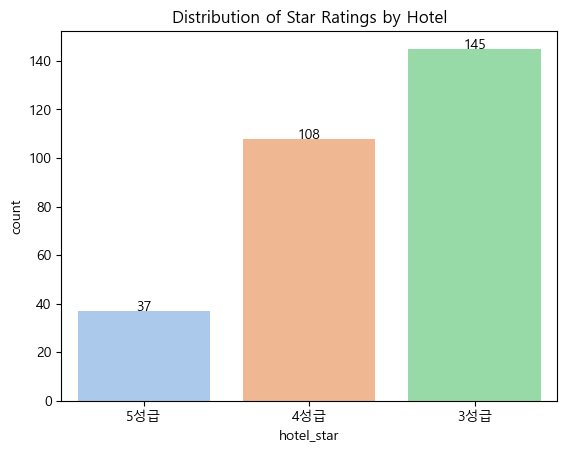

In [156]:
# 5번
sns.countplot(
    data = hotels,
    x = 'hotel_star',
    palette = 'pastel'
)
plt.title('Distribution of Star Ratings by Hotel')
plt.text(0,37,37,ha='center')
plt.text(1,108,108,ha='center')
plt.text(2,145,145,ha='center')

Text(2, 8.164, '8.164')

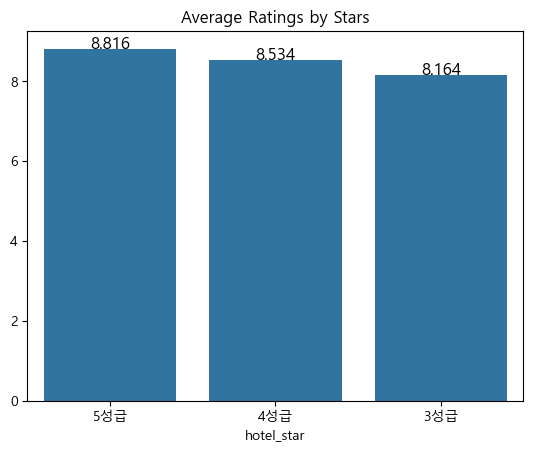

In [158]:
# 6번
mean = hotels.groupby('hotel_star')['hotel_rate'].mean().sort_values(ascending=False)

sns.barplot(
    x = mean.index,
    y = mean.values
)
plt.title('Average Ratings by Stars')
plt.text(0,8.816,8.816,fontsize=12,ha='center')
plt.text(1,8.534,8.534,fontsize=12,ha='center')
plt.text(2,8.164,8.164,fontsize=12,ha='center')

Text(0.5, 1.0, 'Average Ratings by Stars')

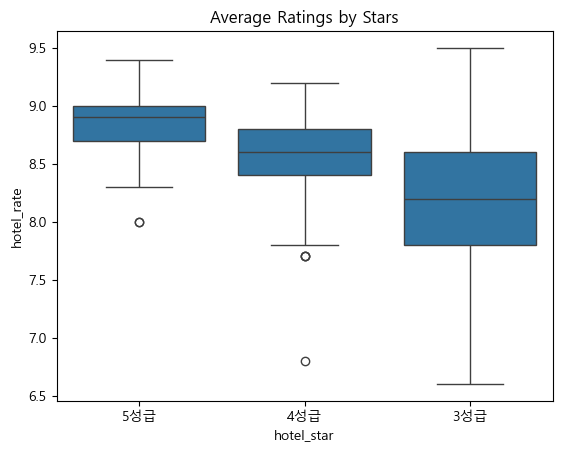

In [159]:
# 7번
sns.boxplot(
    data = hotels,
    x = 'hotel_star',
    y = 'hotel_rate'
)
plt.title('Average Ratings by Stars')

In [160]:
hotels['gu'] = hotels['hotel_location'].str.split(' ', expand=True)[1]


In [161]:
hotels['gu'].value_counts()

gu
중구      90
강남구     37
종로구     34
마포구     20
영등포구    16
서초구     15
용산구     12
강서구     11
송파구      9
구로구      7
동대문구     6
광진구      6
금천구      5
관악구      4
동작구      3
강북구      3
서대문구     2
성북구      2
노원구      2
성동구      2
은평구      2
도봉구      1
강동구      1
Name: count, dtype: int64

Text(0.5, 1.0, 'Number of Hotels by District')

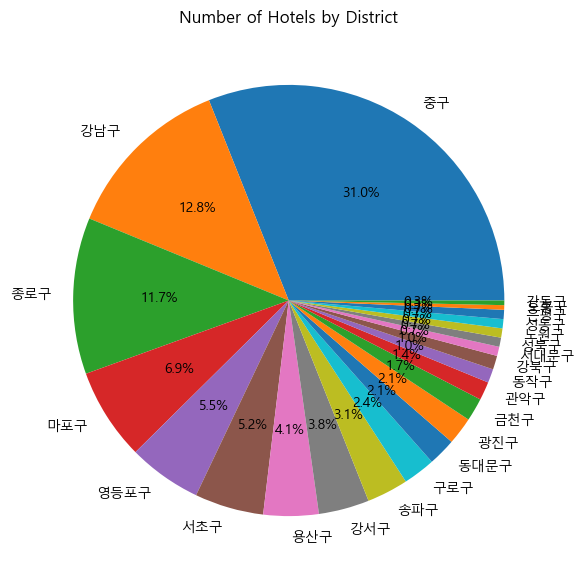

In [162]:
# 8번
plt.figure(figsize=(7,7))
plt.pie(
    hotels['gu'].value_counts(),
    labels = hotels['gu'].value_counts().index,
    autopct='%1.1f%%'
    )
plt.title('Number of Hotels by District')

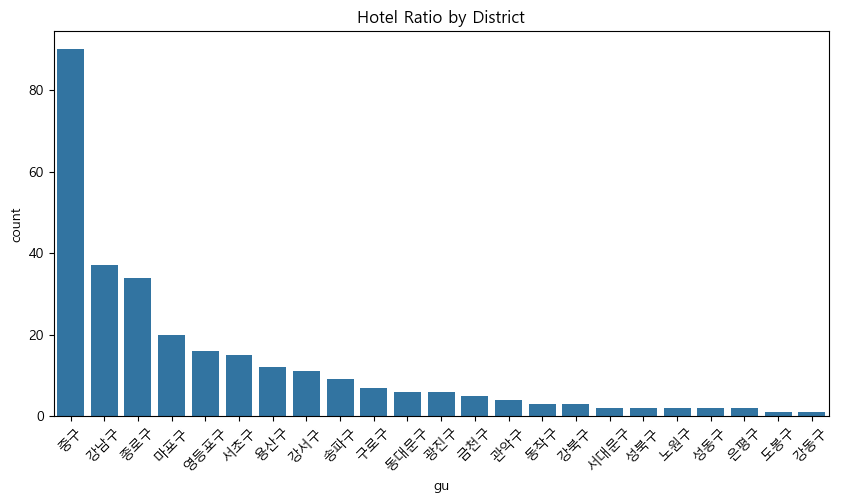

In [164]:
# 9번
plt.figure(figsize=(10,5))
sns.barplot(
    hotels['gu'].value_counts()
    )
plt.title('Hotel Ratio by District')
_=plt.xticks(rotation=45)

C:\Users\xzv22\AppData\Local\Temp\ipykernel_25876\1262818444.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\xzv22\AppData\Local\Temp\ipykernel_25876\1262818444.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\xzv22\AppData\Local\Temp\ipykernel_25876\1262818444.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Text(0.5, 1.0, 'Number of 3-Star Hotels by District')

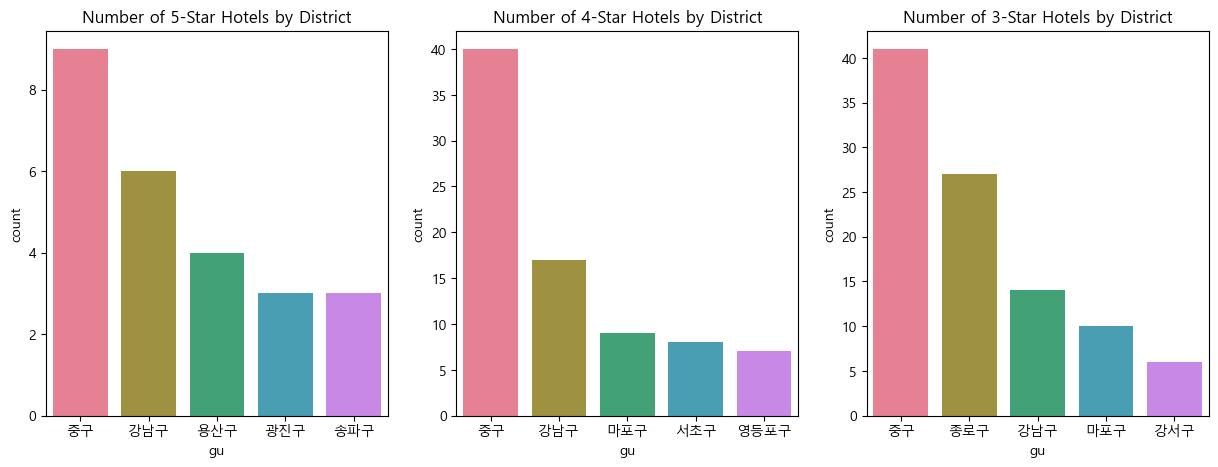

In [165]:
# 10번
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.barplot(
    hotels[hotels['hotel_star'] == '5성급']['gu'].value_counts().head(5),
    palette = 'husl'
)
plt.title('Number of 5-Star Hotels by District')

plt.subplot(1,3,2)
sns.barplot(
    hotels[hotels['hotel_star'] == '4성급']['gu'].value_counts().head(5),
    palette = 'husl'
)
plt.title('Number of 4-Star Hotels by District')

plt.subplot(1,3,3)
sns.barplot(
    hotels[hotels['hotel_star'] == '3성급']['gu'].value_counts().head(5),
    palette = 'husl'
)
plt.title('Number of 3-Star Hotels by District')

C:\Users\xzv22\AppData\Local\Temp\ipykernel_25876\810268117.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\xzv22\AppData\Local\Temp\ipykernel_25876\810268117.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


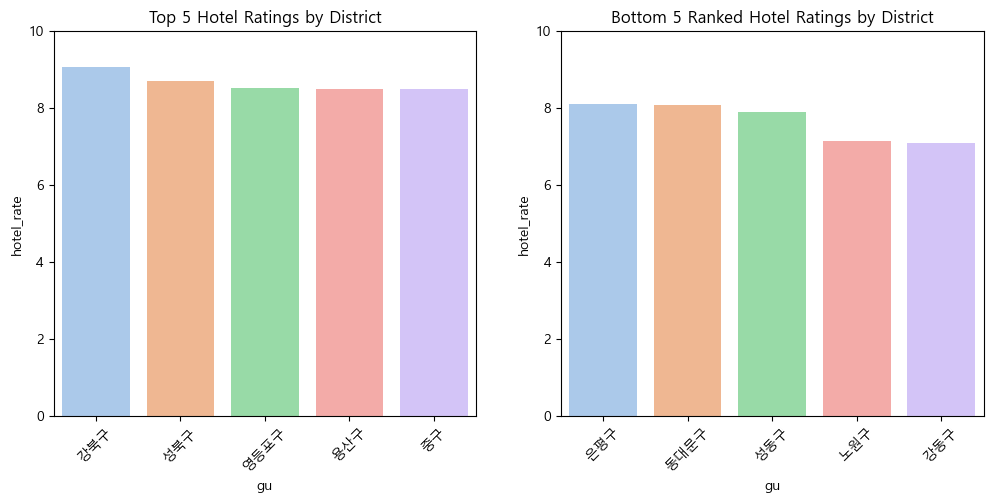

In [166]:
# 11번
gu_mean = hotels.groupby('gu')['hotel_rate'].mean().sort_values(ascending=False)
colours = ['pink','skyblue','lightgreen','orange','gold']

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.barplot(
    gu_mean[:5],
    palette = 'pastel'
)
plt.ylim(0,10)
plt.title('')
plt.title('Top 5 Hotel Ratings by District')
_=plt.xticks(rotation=45)

plt.subplot(1,2,2)
sns.barplot(
    gu_mean[-5:],
    palette = 'pastel'

)
plt.ylim(0,10)
plt.title('Bottom 5 Ranked Hotel Ratings by District')
_=plt.xticks(rotation=45)

토큰화

In [195]:
total_reviews = sum(len(inner_list) for inner_list in hotels["review"])
print("전체 호텔 리뷰수: 115498")
print("총 호텔 수: 296")
print("결측치 제거 후 호텔 수:",len(hotels["review"]))

전체 호텔 리뷰수: 115498
총 호텔 수: 296
결측치 제거 후 호텔 수: 290
